In [ ]:
# Estamos importando las librerias necesarias
import numpy as np # libreria para calculos
import matplotlib.pyplot as plt # Libreria para visualización

In [ ]:
B1 = 0.6961663
B2 = 0.4079426
B3 = 0.8974794
C1 = (0.0684043)**2
C2 = (0.1162414)**2
C3 = (9.896161)**2
l_onda_n = 650 # Longitud de onda en nanometros
l_o_m = l_onda_n/1000 # Longitud de onda micrometros
A1 = B1*l_o_m**2/(l_o_m**2-C1)
A2 = B2*l_o_m**2/(l_o_m**2-C2)
A3 = B3*l_o_m**2/(l_o_m**2-C3)
n = (1+A1+A2+A3)**0.5 # Índice de refracción en función de la longitud de onda
print('Longitud de onda = ',l_onda_n,'[nm], n=',n,', para el Si02')

Longitud de onda =  650 [nm], n= 1.4565349736401405 , para el Si02


Posición de los fotosensores
Sensor #  1 ,Longitud de Onda:  350.0  [nm], Posición:  1.227976 [m]
Sensor #  2 ,Longitud de Onda:  450.0  [nm], Posición:  1.232265 [m]
Sensor #  3 ,Longitud de Onda:  530.0  [nm], Posición:  1.234106 [m]
Sensor #  4 ,Longitud de Onda:  580.0  [nm], Posición:  1.23491 [m]
Sensor #  5 ,Longitud de Onda:  620.0  [nm], Posición:  1.235432 [m]
Sensor #  6 ,Longitud de Onda:  650.0  [nm], Posición:  1.235772 [m]
Distancia entre fotosensores
Distancia entre sensor  1 2 :  4.289039 [mm]
Distancia entre sensor  2 3 :  1.840903 [mm]
Distancia entre sensor  3 4 :  0.804292 [mm]
Distancia entre sensor  4 5 :  0.522322 [mm]
Distancia entre sensor  5 6 :  0.33906 [mm]


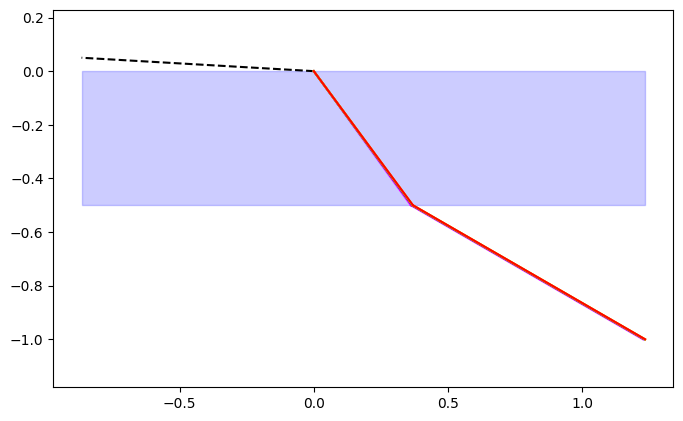

In [ ]:
# #@title DISPERSIÓN BAJO EL MODELO SELLMEIER { run: "auto" }
lon = np.array([350,450,530,580,620,650])/1000 # Longitud de onda en micrometros
#lon = np.arange(350,800,30)/1000 # Longitud de onda en micrometros
A1 = B1*lon**2/(lon**2-C1)
A2 = B2*lon**2/(lon**2-C2)
A3 = B3*lon**2/(lon**2-C3)
n1 = 1 # Índice para el medio no dispersivo
n2 = (1+A1+A2+A3)**0.5 # Índice para el medio dispersivo
#angulo_i_1 = 60 #@param {type:"slider", min:0, max:89, step:1}
angulo_i_1 = 60
theta_i_1 = angulo_i_1*np.pi/180  #Ángulo incidente en radianes
theta_t_1 = np.arcsin((n1/n2)*np.sin(theta_i_1))
b = 0.5
x_1 = b*np.tan(theta_t_1) # Posiciones de incidencia en la segunda interfaz
theta_i_2 = theta_t_1 # Ángulos de incidencia para la interfaz 2
theta_t_2 = np.arcsin((n2/n1)*np.sin(theta_i_2))
d = 0.5
ps = x_1 + d*np.tan(theta_t_2) # Posición de los sensores
print("Posición de los fotosensores")
for j in range(len(lon)):
  print("Sensor # ",j+1,",Longitud de Onda: ",lon[j]*1000," [nm], Posición: ",np.round(ps[j],6),"[m]")

print("Distancia entre fotosensores")
dist = ps[1:]-ps[0:-1]
for j in range(len(lon)-1):
  print("Distancia entre sensor ",j+1,j+2,": ",np.round(dist[j]*1e3,6),"[mm]")


# Consideraciones para efectos de visualización
plt.figure(figsize=(8,5),dpi=100)
a_col = np.array([[1,0,1],[0,0,1],[0,1,0],[1,1,0],[1,0.7,0],[1,0,0]])#Arreglo de colores
bi = 0.05
plt.plot([0,-b*np.tan(theta_i_1)],[0,bi],'--k')
x = np.linspace(-b*np.tan(theta_i_1),np.max(ps),300)
plt.fill_between(x, 0, -b, color='blue',
                 alpha=0.2)
for i in range(len(lon)):
  plt.plot([0,x_1[i]],[0,-b],color = a_col[i,:])
  plt.plot([x_1[i],ps[i]],[-b,-b-d],color = a_col[i,:])
  plt.axis('equal')
  #plt.ylim(-15,-12)
  #plt.xlim(np.min(ps),np.max(ps))
plt.show()